### Digital Humanities First Assignment:

Input:

Output:


In [65]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../1/data/feeding-america.csv", index_col = 'date')

df.head()

,book_id,ethnicgroup,recipe_class,region,ingredients
date,,,,,
1922,fofb.xml,mexican,soups,ethnic,chicken;green pepper;rice;salt;water
1922,fofb.xml,mexican,meatfishgame,ethnic,chicken;rice
1922,fofb.xml,mexican,soups,ethnic,allspice;milk
1922,fofb.xml,mexican,fruitvegbeans,ethnic,breadcrumb;cheese;green pepper;pepper;salt;sar...
1922,fofb.xml,mexican,eggscheesedairy,ethnic,butter;egg;green pepper;onion;parsley;pepper;s...


In [66]:
print(len(df))        #Number of receipes

48032


In [67]:
print(df['recipe_class'].unique())

['soups' 'meatfishgame' 'fruitvegbeans' 'eggscheesedairy' 'breadsweets'
 'beverages' 'accompaniments' 'medhealth']


In [68]:
df['recipe_class'].value_counts()

breadsweets        14630
meatfishgame       11477
fruitvegbeans       7085
accompaniments      5495
eggscheesedairy     4150
soups               2631
beverages           2031
medhealth            533
Name: recipe_class, dtype: int64

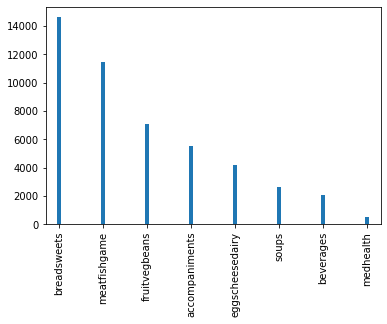

In [69]:
df['recipe_class'].value_counts().plot(kind='bar', color="C0", width=0.1)
plt.show()

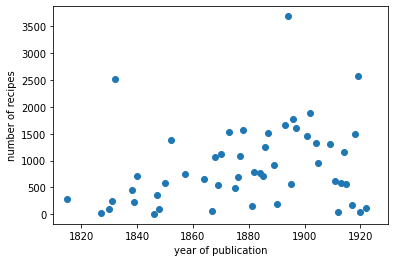

In [70]:
grouped = df.groupby('date')
recipe_counts = grouped.size()
recipe_counts.plot(style='o', xlim=(1810, 1930))
plt.ylabel("number of recipes")
plt.xlabel("year of publication")
plt.show()

In [197]:
#df1  = df.copy()
#df1['ingredients'] = df['ingredients'].str.split(';')
#grouped = df1[['date', 'ingredients']].groupby('date')


#for key, item in grouped:
 #   print(grouped.get_group(key), "\n\n")
    
ingredients = df['ingredients'].str.split(';')
# group all rows from the same year
groups = ingredients.groupby('date')
# merge the lists from the same year
ingredients = groups.sum()
# compute counts per year
ingredients = ingredients.apply(pd.Series.value_counts).fillna(0)
# normalise the counts
ingredients = ingredients.divide(recipe_counts, 0)

#ingredients.head()


# filter only required ingredients for 1800-1820 and 1900 and above
year_before = 1820
year_after = 1900

#edited_rows = ingredients.loc[(ingredients.index > year_after) | (ingredients.index < year_before)]
#edited_rows

edited_rows = ingredients.loc[((ingredients.index >= 1900) & (ingredients.index <=1920)) | ((ingredients.index >=1820) & (ingredients.index <=1840))]
edited_rows




,butter,salt,water,flour,nutmeg,pepper,lemon,sugar,mace,egg,...,farina cream,tea biscuit,salmon head,colbert sauce,perch fillet,avocado,rock cod fillet,tournedo,lime yeast,dried flower
date,,,,,,,,,,,,,,,,,,,,,
1827,0.000000,0.066667,0.600000,0.000000,0.033333,0.033333,0.200000,0.400000,0.000000,0.033333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1830,0.234043,0.414894,0.489362,0.297872,0.127660,0.148936,0.063830,0.329787,0.021277,0.223404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1831,0.467213,0.250000,0.352459,0.372951,0.122951,0.114754,0.036885,0.471311,0.028689,0.385246,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1832,0.377389,0.330414,0.382166,0.265525,0.125000,0.183121,0.083599,0.296178,0.086385,0.202627,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1838,0.466368,0.446188,0.448430,0.282511,0.141256,0.253363,0.047085,0.159193,0.082960,0.239910,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1839,0.413793,0.413793,0.461207,0.306034,0.120690,0.181034,0.034483,0.219828,0.073276,0.224138,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1840,0.433148,0.374652,0.576602,0.295265,0.224234,0.189415,0.094708,0.271588,0.147632,0.222841,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1901,0.348662,0.459163,0.464653,0.260810,0.037062,0.206589,0.112560,0.446122,0.010295,0.306108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1902,0.410420,0.459862,0.440723,0.251462,0.064859,0.348751,0.061138,0.219564,0.028708,0.215843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [198]:
from sklearn.feature_selection import chi2

# Transform the index into a list of labels, in which each label
# indicates whether a row stems from before or after the Civil War:
labels = ['Early18th' if year < 1840 else 'Post19th' for year in edited_rows.index]

# replace missing values with zero (.fillna(0)),
# and compute the chi2 statistic:
keyness, _ = chi2(edited_rows.fillna(0), labels)
# Turn keyness values into a Series, and sort in descending order:
keyness = pd.Series(keyness, index=edited_rows.columns).sort_values(ascending=False)

In [199]:
keyness.head(20)

pearlash            0.495223
loaf sugar          0.449094
rice water          0.397945
wine                0.385085
baking powder       0.370681
vanilla             0.321912
molass              0.321107
beer                0.317949
yeast               0.314298
currant             0.282046
indian meal         0.271841
lemon peel          0.252384
gravy               0.217980
saltpetre           0.212098
lemon brandy        0.208674
ice                 0.199448
tomato              0.194492
soda                0.191709
granulated sugar    0.176807
salt                0.165199
dtype: float64

In [200]:
#ingredients['date']
#counts = df['edited_rows'].str.split(';').groupby('date').sum().apply(pd.Series.value_counts).fillna(0)
#print(counts)

agg1 = edited_rows.loc[edited_rows.index > 1900].sum().rank(method='dense', pct=True)
print(agg1.sort_values(ascending=False).head(10))

print("loaf sugar",agg1['loaf sugar'])

salt        1.000000
water       0.999167
butter      0.998333
sugar       0.997500
flour       0.996667
egg         0.995833
pepper      0.995000
milk        0.994167
egg yolk    0.993333
onion       0.992500
dtype: float64
loaf sugar 0.8533333333333334


In [201]:
agg2 = edited_rows.loc[ edited_rows.index < 1840 ].sum().rank(method='dense', pct=True)
print(agg2.sort_values(ascending=False).head(10))

print("loaf sugar",agg2['loaf sugar'])

water      1.000000
butter     0.997423
salt       0.994845
sugar      0.992268
flour      0.989691
egg        0.987113
milk       0.984536
pepper     0.981959
nutmeg     0.979381
vinegar    0.976804
dtype: float64
loaf sugar 0.961340206185567


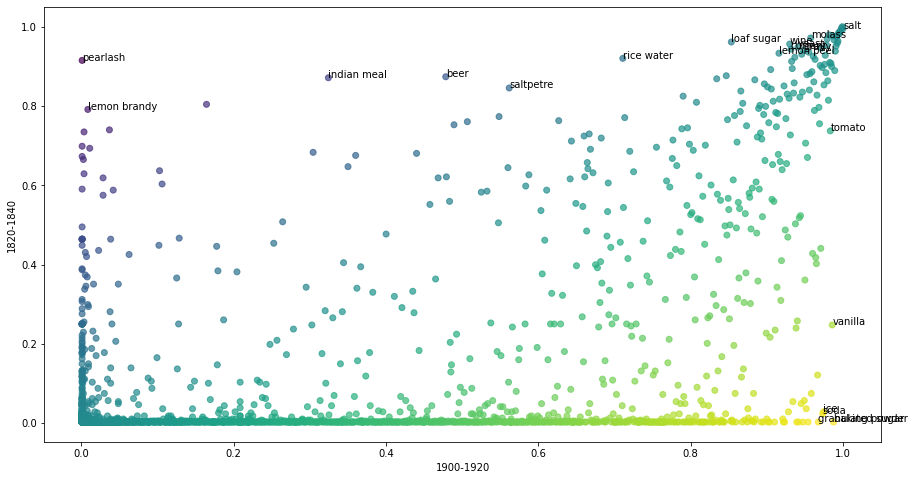

In [206]:
rankings=pd.DataFrame({'1900-1920': agg1, '1820-1840': agg2})

fig = plt.figure(figsize=(15, 8))
plt.scatter(rankings['1900-1920'], rankings['1820-1840'], 
            c=rankings['1900-1920'] - rankings['1820-1840'],alpha=0.7)
for i, row in rankings.loc[keyness.head(20).index].iterrows():
    plt.annotate(i, xy=(row['1900-1920'], row['1820-1840']))

plt.xlabel("1900-1920")
plt.ylabel("1820-1840")
plt.show()


### Comparison of receipes between 1820-1840 and 1900-1920:
```

```

In [74]:
import scipy.stats

def plot_trend(column, df, line_color='grey', xlim=(1810, 1930)):
    slope, intercept, _, _, _ = scipy.stats.linregress(
        df.index, df[column].fillna(0).values)
    ax = df[column].plot(style='o', label=column)
    ax.plot(df.index, intercept + slope * df.index, '--',
             color=line_color, label='_nolegend_')
    ax.set_ylabel("fraction of recipes")
    ax.set_xlabel("year of publication")
    ax.set_xlim(xlim)

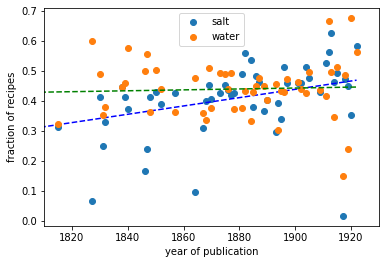

In [78]:
plot_trend('salt', ingredients, line_color='b')
plot_trend('water', ingredients, line_color='g')
plt.legend();  # add a legend to the plot


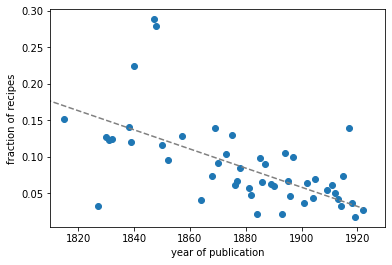

In [19]:
plot_trend('nutmeg', ingredients)